## How to run Metient-calibrate on a subset of real metastatic NSCLC patients (TRACERx)

### To run this notebook, you'll need metient installed:

```bash
mamba create -n "met" python=3.8.8 ipython
mamba activate met
pip install metient
```

### Import libraries and setup paths

In [1]:
import os
from metient import metient as met

### Setup paths
# Path to where our input clone trees and tsvs are located
input_dir = os.path.join(os.getcwd(), "inputs")
# Path to save outputs
output_dir = os.path.join(os.getcwd(), "outputs")

/lila/home/koyyald/mambaforge/envs/met/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11030). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA GPU: False


### An example of the expected tsv file format for patient CRUK0010
**The required columns are:**
`anatomical_site_index, anatomical_site_label, cluster_index, character_index, character_label, ref, var, var_read_prob, site_category`

In [2]:
import pandas as pd
df = pd.read_csv(os.path.join(input_dir, "CRUK0010_SNVs.tsv"), sep="\t")
df

,anatomical_site_index,anatomical_site_label,cluster_index,character_index,character_label,ref,var,var_read_prob,site_category
0,0,metachronousMet_BR_LN1,0,0,SETD2,128,40,0.250,metastasis
1,1,metachronousMet_BR_LN2,0,0,SETD2,212,64,0.200,metastasis
2,2,metachronousMet_BR_LN3,0,0,SETD2,188,47,0.220,metastasis
3,3,LN_SU_FLN1,0,0,SETD2,422,96,0.250,metastasis
4,4,primary_SU_T1,0,0,SETD2,81,236,0.701,primary
...,...,...,...,...,...,...,...,...,...
1159,1,metachronousMet_BR_LN2,6,236,MAN2C1,528,0,0.100,metastasis
1160,2,metachronousMet_BR_LN3,6,236,MAN2C1,532,0,0.110,metastasis
1161,3,LN_SU_FLN1,6,236,MAN2C1,494,11,0.125,metastasis
1162,4,primary_SU_T1,6,236,MAN2C1,624,0,0.305,primary


## Step 1: Load filepaths to clone trees and tsv files for each patient

In [3]:
patients = ["CRUK0003", "CRUK0010", "CRUK0013", "CRUK0029", "CRUK0590"]

clone_tree_fns = [os.path.join(input_dir, f"{patient}_tree.txt") for patient in patients]
ref_var_fns = [os.path.join(input_dir, f"{patient}_SNVs.tsv") for patient in patients]

## Step 2: Run Metient-calibrate

Saving results to /lila/data/morrisq/divyak/projects/metient/tutorial/outputs/calibrate
Overwriting existing directory at /lila/data/morrisq/divyak/projects/metient/tutorial/outputs/calibrate
Calibrating for patient: CRUK0003
Calculated batch size: 9728
Restructuring adjacency matrix for CRUK0003_primary_SU_T1 since root node is not at index 0


/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:307: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:04<00:00, 16.61it/s]


{'primary single-source seeding': 4, 'not primary single-source seeding': 8}
# final solutions: 1
Calibrating for patient: CRUK0010
Calculated batch size: 1024


100%|██████████| 75/75 [00:01<00:00, 62.64it/s]


{'primary single-source seeding': 16, 'not primary single-source seeding': 21}
# final solutions: 3
Calibrating for patient: CRUK0013
Calculated batch size: 1024


100%|██████████| 75/75 [00:00<00:00, 85.75it/s]


{'primary single-source seeding': 17, 'not primary single-source seeding': 21}
# final solutions: 1
Calibrating for patient: CRUK0029
Calculated batch size: 11008


100%|██████████| 75/75 [00:09<00:00,  7.73it/s]


{'primary single-source seeding': 15, 'not primary single-source seeding': 16}
# final solutions: 2
Calibrating for patient: CRUK0590
Calculated batch size: 9984


100%|██████████| 75/75 [00:08<00:00,  8.48it/s]


{'primary single-source seeding': 18, 'not primary single-source seeding': 18}
# final solutions: 7
Calibrating to 5 patients
Early stopping after 392 epochs.
Optimized thetas: tensor([0.4159, 0.2921, 0.2921], grad_fn=<DivBackward0>)
CRUK0003_primary_SU_T1
5 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

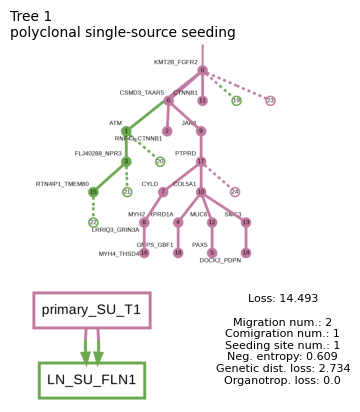

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)


CRUK0010_primary_SU_T1
5 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

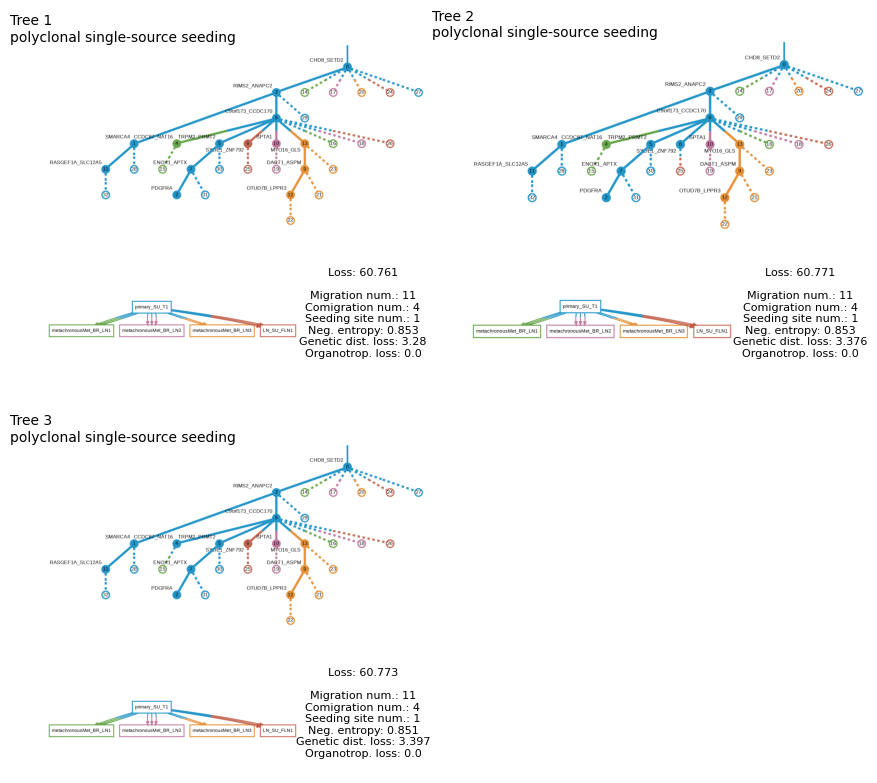

CRUK0013_primary_SU_T1
5 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

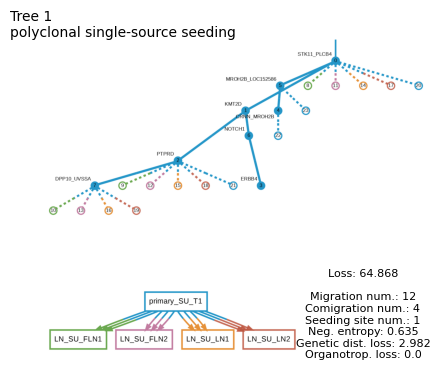

CRUK0029_primary_SU_T1
5 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

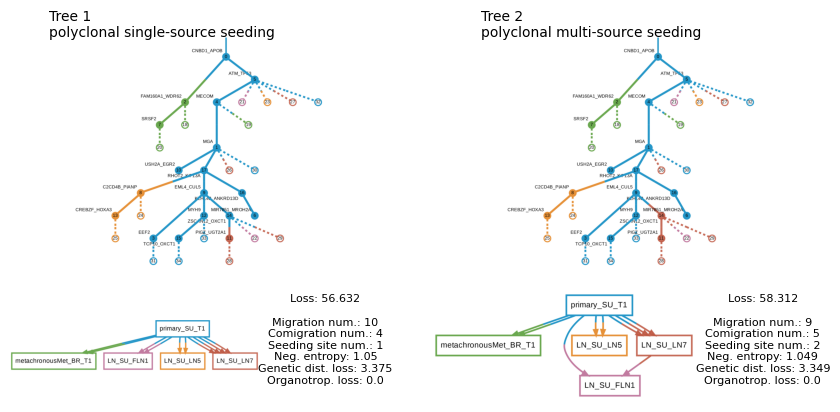

CRUK0590_primary_SU_T1


<Figure size 640x480 with 0 Axes>

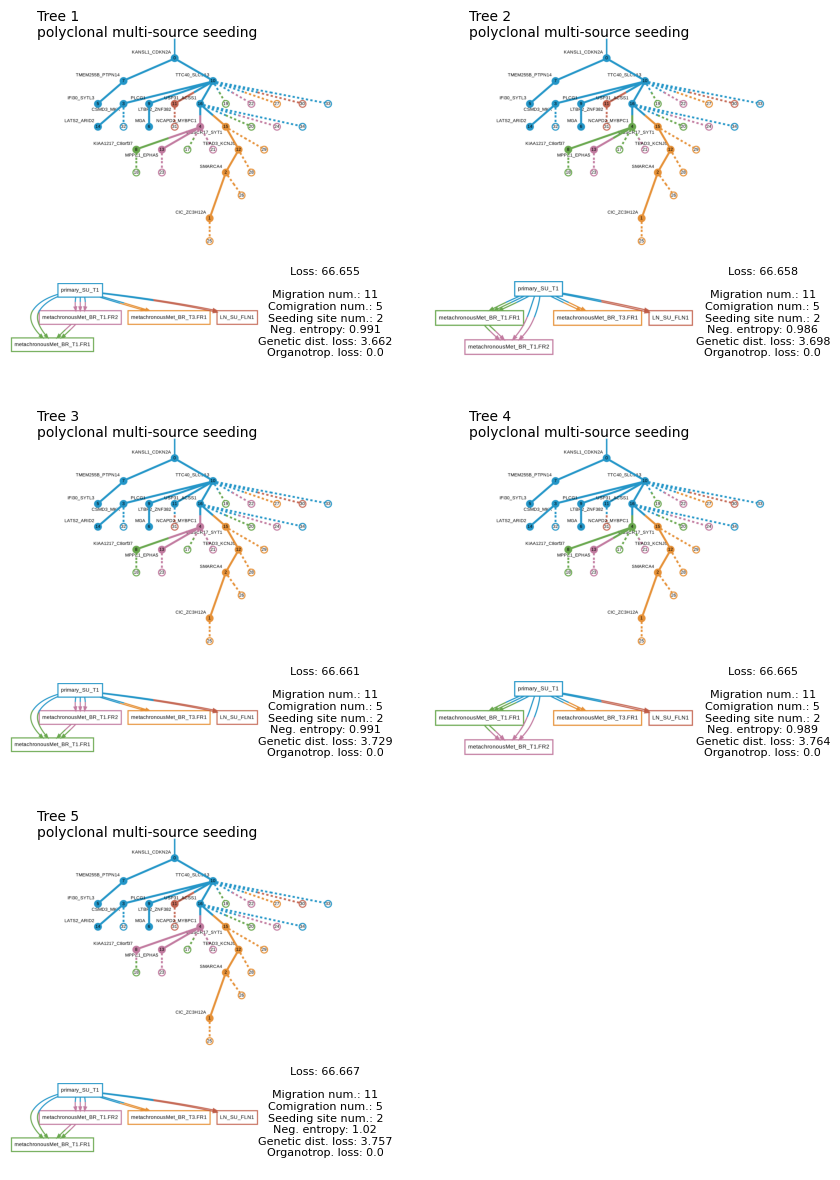

[0.4158580005168915, 0.29207101464271545, 0.29207101464271545]

In [4]:
weights = met.Weights(gen_dist=0.1)
print_config = met.PrintConfig(visualize=True, verbose=False, k_best_trees=5)
met.calibrate(clone_tree_fns, ref_var_fns, print_config, 
              output_dir, patients)


## Step 3: Use the pickle file outputs for downstream analysis

### In addition to the visualizations that Metient provides, we also save pkl.gz files for each Metient run that contain all the results of the run.

In [5]:
import gzip
import pickle

with gzip.open(os.path.join(output_dir,"calibrate", "CRUK0003_primary_SU_T1.pkl.gz") ,"rb") as f:
    pckl = pickle.load(f)
print(pckl.keys())

# V is the best ancestral labeling
V = pckl['ancestral_labelings'][0]
# A is the adjacency matrix that is the input clone tree + inferred leaf nodes
A = pckl['full_adjacency_matrices'][0]
# G represents the migration graph
G = met.get_migration_graph(V, A)

print("\nmigration graph:\n", G)
# Get the seeding pattern for this patient (e.g. "polyconal single-source seeding")
seeding_pattern = met.get_verbose_seeding_pattern(V, A)
print("\ninferred seeding pattern:\n", seeding_pattern)

dict_keys(['ancestral_labelings', 'losses', 'full_tree_node_idx_to_labels', 'full_adjacency_matrices', 'ordered_anatomical_sites', 'loss_dict', 'primary_site', 'subclonal_presence_matrices', 'pars_weights', 'soft_v', 'gen_dist_matrices'])

migration graph:
 tensor([[0., 0.],
        [2., 0.]])

inferred seeding pattern:
 polyclonal primary single-source seeding
